# Image Classification with fastai library
- First, install `fastai` library
  - `fastbook` is a library for using `fastai` on Jupyter Notebook
  - if you install `fastbook`, it will automatically install `fastai`

In [13]:
BATCH_SIZE=512

In [14]:
!pip install -Uqq fastbook # -U for --upgrade, -q for quiet
!pip install -q fastai==2.5.2
# import fastbook
from fastbook import *

### `from fastai.vision.all import *`
- This command will import every function, class, and variable as global variables
  - You can check what kind of variables are defined in notebook by calling `who` or `whos`

In [15]:
from fastai.vision.all import *

## 1. Download Dataset
- `untar_data` will download the dataset and unzip the file 
  - It returns `pathlib.Path` object that represents a directory path of the downloaded dataset

In [16]:
path = untar_data(URLs.PETS)
print(path)
image_path = path / 'images'
list_of_file = image_path.ls()


/home/teo/.fastai/data/oxford-iiit-pet


- Take the 0th image in the directory

/home/teo/.fastai/data/oxford-iiit-pet/images/Siamese_155.jpg


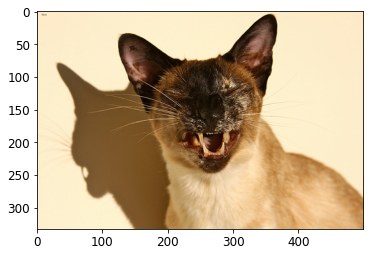

In [23]:
from PIL import Image # Python Image Library
fname = list_of_file[20]
image = Image.open(fname)
plt.imshow(image)
print(fname)

/home/teo/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_192.jpg
/home/teo/.fastai/data/oxford-iiit-pet/images/basset_hound_71.jpg
/home/teo/.fastai/data/oxford-iiit-pet/images/newfoundland_64.jpg
/home/teo/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_119.jpg
/home/teo/.fastai/data/oxford-iiit-pet/images/beagle_19.jpg
/home/teo/.fastai/data/oxford-iiit-pet/images/pug_111.jpg
/home/teo/.fastai/data/oxford-iiit-pet/images/Bengal_20.jpg
/home/teo/.fastai/data/oxford-iiit-pet/images/pomeranian_75.jpg
/home/teo/.fastai/data/oxford-iiit-pet/images/Maine_Coon_26.jpg
/home/teo/.fastai/data/oxford-iiit-pet/images/Siamese_81.jpg


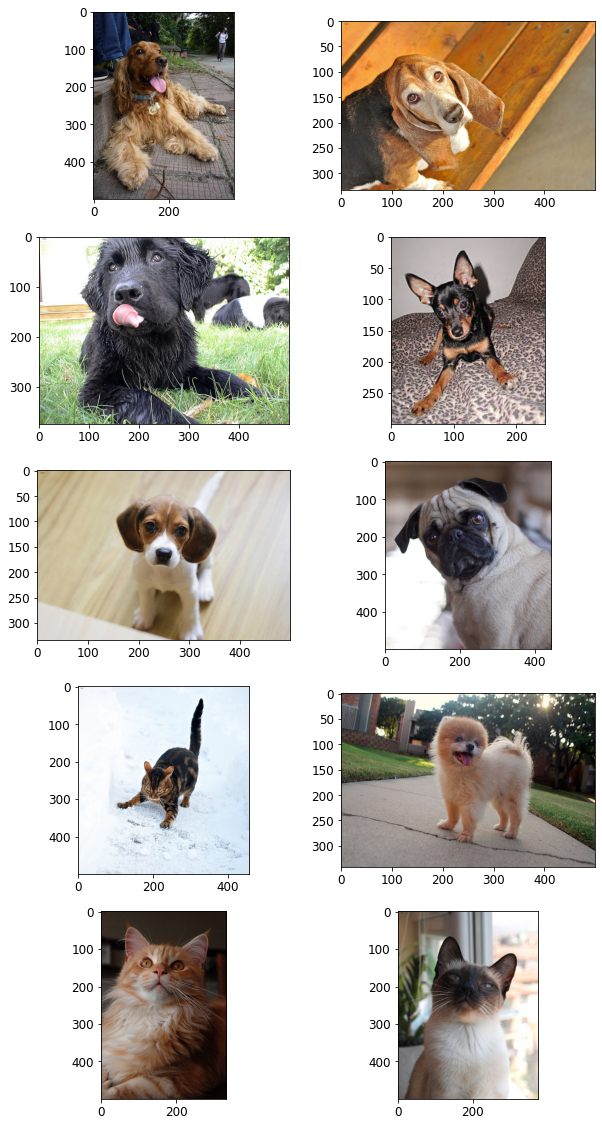

In [24]:
# Let's make it in a loop
plt.figure(figsize=(10,20))
for i in range(10):
  fname = list_of_file[i]
  print(fname)
  image = Image.open(fname)
  plt.subplot(5,2, i+1)
  plt.imshow(image)

In [26]:
list_of_file

(#7393) [Path('/home/teo/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_192.jpg'),Path('/home/teo/.fastai/data/oxford-iiit-pet/images/basset_hound_71.jpg'),Path('/home/teo/.fastai/data/oxford-iiit-pet/images/newfoundland_64.jpg'),Path('/home/teo/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_119.jpg'),Path('/home/teo/.fastai/data/oxford-iiit-pet/images/beagle_19.jpg'),Path('/home/teo/.fastai/data/oxford-iiit-pet/images/pug_111.jpg'),Path('/home/teo/.fastai/data/oxford-iiit-pet/images/Bengal_20.jpg'),Path('/home/teo/.fastai/data/oxford-iiit-pet/images/pomeranian_75.jpg'),Path('/home/teo/.fastai/data/oxford-iiit-pet/images/Maine_Coon_26.jpg'),Path('/home/teo/.fastai/data/oxford-iiit-pet/images/Siamese_81.jpg')...]

In [25]:
entire_label_names = []
for img_fname in list_of_file:
  label_name = re.findall(r'(.+)_\d+.jpg', img_fname.name)
  if len(label_name) > 0:
    entire_label_names.append(label_name[0])
  else:
    print(f'Error case: {img_fname.name}')
entire_label_names = set(entire_label_names)
print(f'There are {len(entire_label_names)} categories: {entire_label_names}')

Error case: Abyssinian_102.mat
Error case: Abyssinian_100.mat
Error case: Abyssinian_101.mat
There are 37 categories: {'Egyptian_Mau', 'leonberger', 'beagle', 'american_bulldog', 'english_setter', 'newfoundland', 'chihuahua', 'scottish_terrier', 'Abyssinian', 'British_Shorthair', 'miniature_pinscher', 'Persian', 'american_pit_bull_terrier', 'pomeranian', 'japanese_chin', 'keeshond', 'basset_hound', 'yorkshire_terrier', 'german_shorthaired', 'staffordshire_bull_terrier', 'samoyed', 'Bengal', 'Sphynx', 'Russian_Blue', 'shiba_inu', 'Maine_Coon', 'wheaten_terrier', 'Siamese', 'havanese', 'boxer', 'Bombay', 'pug', 'Ragdoll', 'english_cocker_spaniel', 'saint_bernard', 'great_pyrenees', 'Birman'}


## 2. Make fastai `DataBlock`
- Automatically handles dataset
  - blocks: How to return data sample as a pair
    - `(ImageBlock, CategoryBlock)`: return a pair of image and the corresponding category (class index)
  - get_items: How to load each item
  - get_y: How to load target label
  - splitter: How to split train/validation
  - item_tfms: How to transform each item after loading to collate items as a batch
    - In image dataset with various image size, we have to `Resize` the image
    - `Resize` takes three inputs
      - `size`: Desired output size in square
      - `method`: one from `['crop', 'squish', 'pad']` 
      - `pad_mode`: one from `['reflection', 'border', 'zeros']`

  - batch_tfms: How to transform a batch

In [55]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items= get_image_files,
                 get_y= using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name' ),
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75)
                )
dls = pets.dataloaders(image_path)

- Test `item_tfms` and `batch_tfms` by `DataBlock.new()`

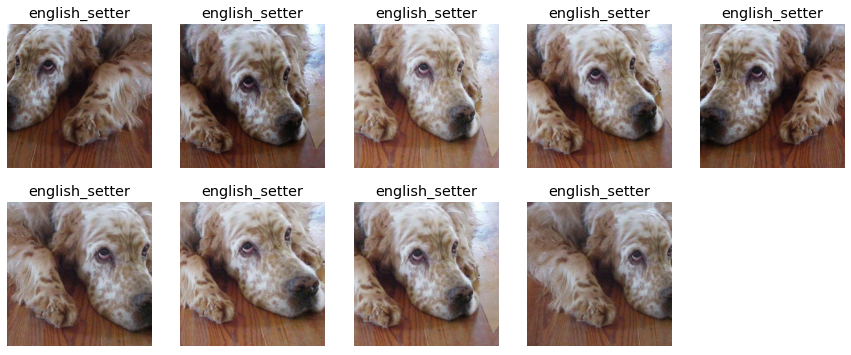

In [31]:
dls.train.show_batch(nrows=2, ncols=5, unique=True)

- Try with different aug_transforms
    - `mult` defines how strong you give the data augmentation

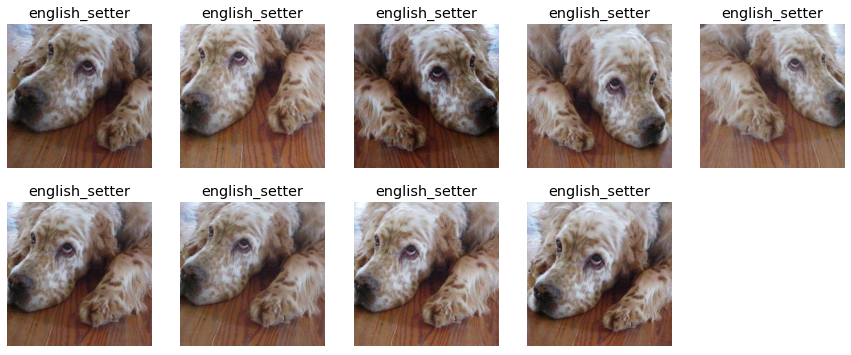

In [42]:
# pets = pets.new(batch_tfms=aug_transforms(size=224, min_scale=0.8, mult=1))
# dls = pets.dataloaders(image_path, bs=BATCH_SIZE)
# dls.train.show_batch(nrows=2, ncols=5, unique=True)

- `method`: `'pad'`, `'crop'`, `'squish'`
- `pad` : 'zeros', 'reflection', 'border'

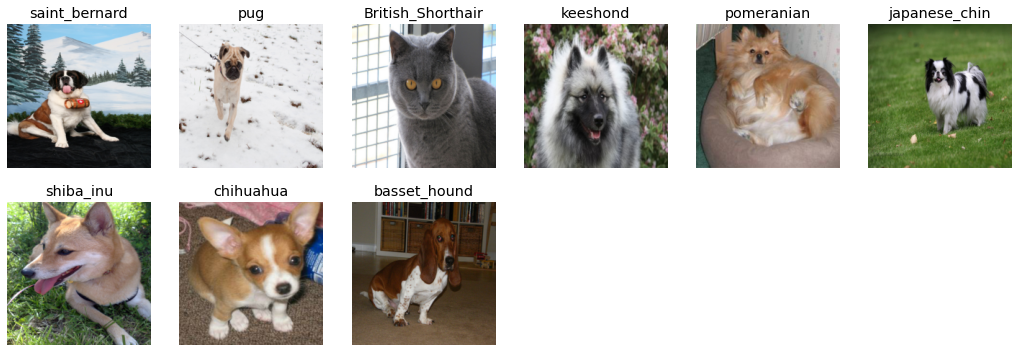

In [45]:
pets.new(item_tfms=Resize(200, method='squish',pad_mode='zeros' )).dataloaders(image_path).show_batch(nrows=2, ncols=6, unique=False)

- Call single batch by `x, y = dls.one_batch()`
  - You can plot image with `.show()`

In [10]:
x, y =dls.one_batch()

In [11]:
x.shape

torch.Size([64, 3, 224, 224])

TensorCategory(24, device='cuda:0')

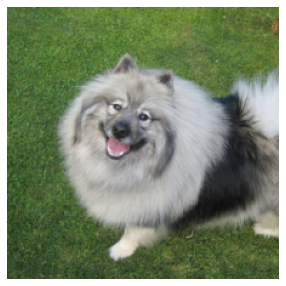

In [12]:
x[2].show()
y[2]

## 3. Train with Learner
- `Learner` is a class that includes almost everything for training neural network, like model, dataloader, and training loop with optimizer.
  - dataloader: DataLoader of fastai
  - model: Model code
    - `from fastai.vision.all import *` have imported all the vision models, such as `resnet18`, `resnet`
  - `pretrained`
  

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate, pretrained=False)
learn.fit(10)

epoch,train_loss,valid_loss,error_rate,time
0,4.675980,4.073332,0.964817,00:23
1,4.375810,4.774400,0.965268,00:23
2,4.206030,5.028724,0.961660,00:24
3,4.054208,4.578727,0.955796,00:23
4,3.930186,3.797226,0.901669,00:24
5,3.814516,3.362474,0.852052,00:24
6,3.711124,3.531358,0.880469,00:23
7,3.610214,3.094578,0.852052,00:23
8,3.515774,3.074830,0.824087,00:23
9,3.415010,3.217710,0.871448,00:25


### Transfer learning with `pretrained=True`
- `learn.fine_tune` will update only the last layer of the model

In [56]:
learn = cnn_learner(dls, resnet18, metrics=error_rate, pretrained=True)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.601077,0.453420,0.145467,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.533902,0.347744,0.109608,00:20
1,0.456036,0.340829,0.115020,00:21
2,0.376034,0.362585,0.113667,00:21
3,0.297022,0.358942,0.107578,00:21
4,0.209247,0.339143,0.102165,00:21
5,0.179305,0.312391,0.093369,00:21
6,0.133106,0.277960,0.075778,00:21
7,0.091415,0.285900,0.080514,00:21
8,0.077753,0.275168,0.083221,00:21
9,0.071643,0.273287,0.077808,00:21


- `error_rate` is `1-accuracy`

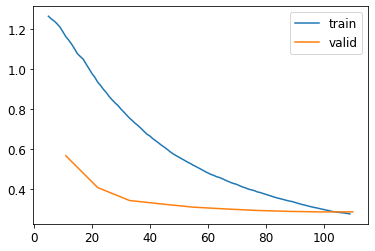

In [49]:
learn.recorder.plot_loss()

## 4. Check the Prediction
- get interpretation result using `ClassificationInterpretation`

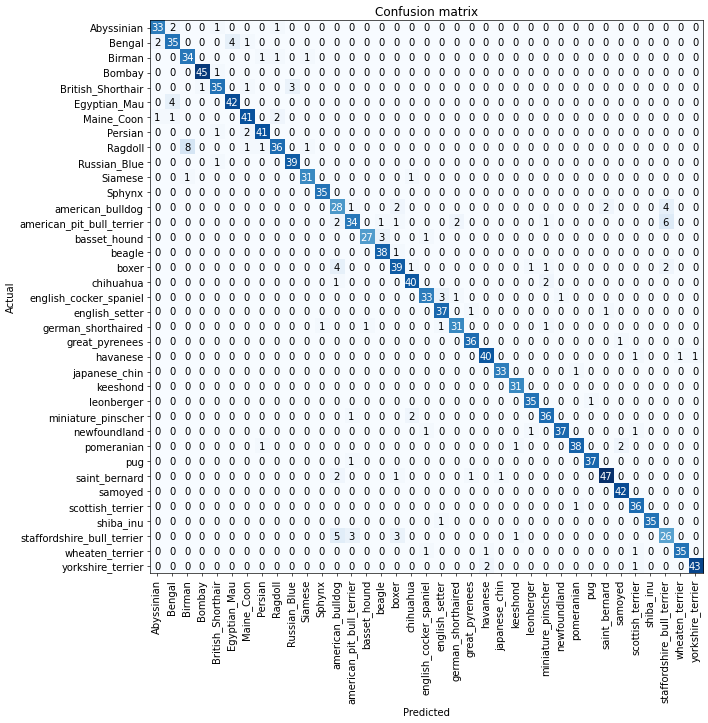

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

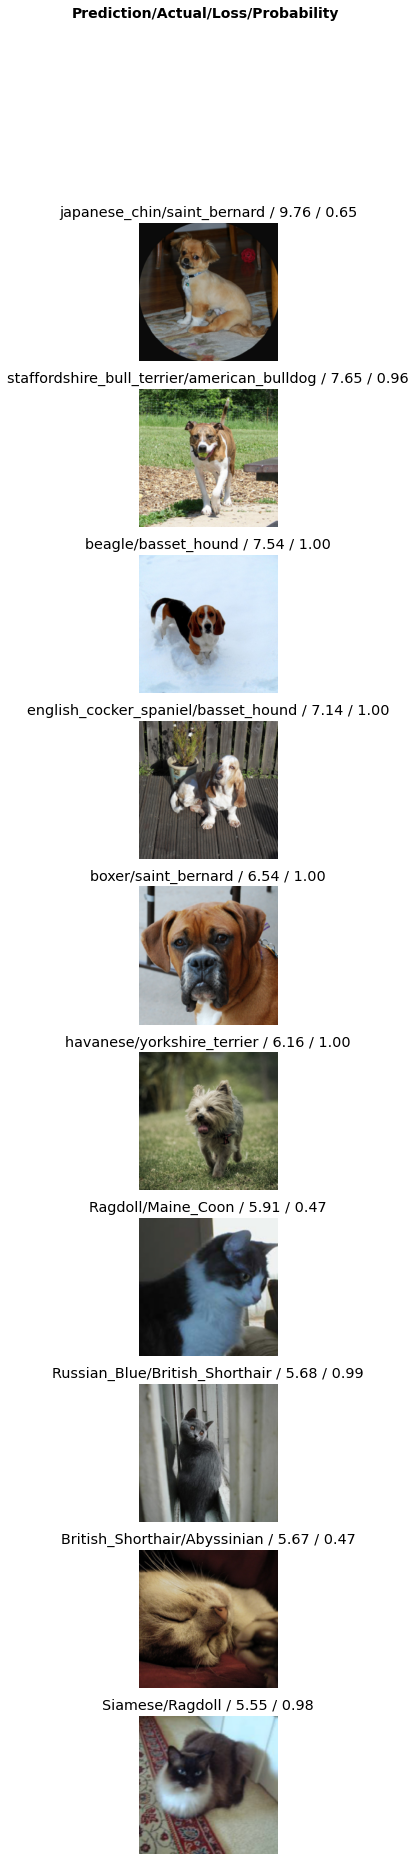

In [52]:
interp.plot_top_losses(10, ncols=1) # the examples of largest mistake that the model made for the validation set

## 5. Try with different training settings
- You can make new `DataLoader` by `DataBlock.new()`
- Since our `DataBlock` object is `pets`, you can use `pets.new()`

In [53]:
pets_without_augmentation = pets.new(item_tfms=Resize(224), batch_tfms=None)
dls_without_augmentation = pets_without_augmentation.dataloaders(image_path)

In [54]:
learn_wihtout_augmentation = cnn_learner(dls_without_augmentation, resnet18, metrics=error_rate, pretrained=True)
learn_wihtout_augmentation.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.570165,0.428783,0.136671,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.493181,0.336159,0.106901,00:14
1,0.367901,0.339398,0.104871,00:14
2,0.270997,0.347820,0.103518,00:14
3,0.182064,0.366171,0.109608,00:14
4,0.118231,0.373479,0.095399,00:14
5,0.073353,0.327697,0.083897,00:14
6,0.047811,0.352205,0.086604,00:14
7,0.035141,0.327280,0.079838,00:14
8,0.021198,0.331720,0.081191,00:14
9,0.016850,0.334936,0.082544,00:14


In [57]:
pets_with_large_augmentation = pets.new(item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75, mult=3))
dls_with_large_augmentation = pets_with_large_augmentation.dataloaders(image_path)
learn_with_large_augmentation = cnn_learner(dls_with_large_augmentation, resnet18, metrics=error_rate, pretrained=True)
learn_with_large_augmentation.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.367664,0.505444,0.156292,00:18


epoch,train_loss,valid_loss,error_rate,time
0,1.232285,0.386480,0.120433,00:20
1,1.038225,0.342515,0.110284,00:20
2,0.962007,0.325980,0.106901,00:20
3,0.867017,0.330691,0.105548,00:21
4,0.797015,0.319687,0.102165,00:21
5,0.708851,0.309512,0.099459,00:21
6,0.633737,0.290546,0.088633,00:21
7,0.566746,0.253327,0.089310,00:21
8,0.583837,0.252133,0.090663,00:21
9,0.531430,0.250531,0.085927,00:20


## 6. Find Optimal Learning Rate
- using `learn.lr_find()`

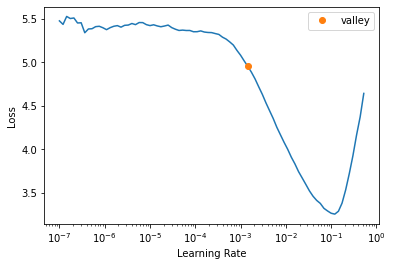

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
lr_output = learn.lr_find()

In [ ]:
lr_output.valley

0.0014454397605732083